# Spliting data into x sets and y sets 


Packages 

In [ ]:
import os
#Change current directory
os.chdir ('../..')
#Check the current directory
os.getcwd()

In [83]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 
import random
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from pickle import dump, load

from src.components.data_processing import FeatureEncoding, DataSplitting
from src.eda import utils
from src.eda.utils import columnsFamilies

In [97]:
#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
train_dev_test_path = "data/train_dev_test"
data_path = "data/experiments_data"
data_samples_path = "data/data_samples"
artifacts_path = "artifacts/eda"
x_y_sets_path = "data/x_y_sets"

In [ ]:
#Reload modules in case a change has occured
#import importlib
#from src.components import data_ingestion, data_structuring
#importlib.reload(data_ingestion)
#importlib.reload(data_structuring)

### Loding data

--------------------

In [102]:
#Loading data
data_date = "2024-10-16"
df_train = pd.read_csv(f"{train_dev_test_path}/{data_date}_df_train_fillna_0.csv", index_col = 0, dtype= {"dn": "string"})
df_dev = pd.read_csv(f"{train_dev_test_path}/{data_date}_df_dev_fillna_0.csv", index_col = 0, dtype= {"dn": "string"})
df_test = pd.read_csv(f"{train_dev_test_path}/{data_date}_df_test_fillna_0.csv",  index_col = 0, dtype= {"dn": "string"})

In [23]:
df_train[df_train["churn_segment"] == "non_churners"]

,dn,gamme,churn_segment,churn_date,activation_bscs_date,id_date,complaints_complaints_complaint_status_resolu_duration_nb_1m,complaints_complaints_complaint_status_resolu_total_nb_1m,complaints_complaints_complaint_type_reclamation_total_nb_1m,complaints_complaints_complaint_type_retention_total_nb_1m,...,data_workingh_y_duration_value_1_3w_3_4w,data_workingh_y_volume_value_1_3w_3_4w,voice_call_direction_oc_duration_value_1_3w_3_4w,voice_destination_type_international_duration_value_1_3w_3_4w,voice_destination_type_national_duration_value_1_3w_3_4w,voice_termination_type_offnet_duration_value_1_3w_3_4w,voice_termination_type_onnet_duration_value_1_3w_3_4w,voice_weekend_n_duration_value_1_3w_3_4w,voice_workingh_n_duration_value_1_3w_3_4w,churn
273972,212604885218,Forfaits 49 dhs,non_churners,2024-03-01,2017-05-02 11:46:40,20240607,0.0,0.0,0.0,0.0,...,0.000688,0.350786,4.574711,0.000000,4.574711,3.367296,4.234107,3.367296,4.234107,0
384918,212690381136,Forfaits Hors 99 dhs,non_churners,2024-03-15,2016-01-25 14:28:35,20240607,0.0,0.0,0.0,0.0,...,0.651672,0.528258,1.286592,0.000000,1.294903,0.982976,1.717072,1.328973,1.630342,0
227423,212714198551,Forfaits 49 dhs,non_churners,2024-02-12,2023-01-30 18:30:38,20240607,0.0,0.0,0.0,0.0,...,-7.575585,-16.692954,0.949891,0.000000,0.949891,-3.555348,0.953837,1.313691,1.253288,0
260646,212647063439,Forfaits 49 dhs,non_churners,2024-04-20,2023-06-22 19:33:51,20240607,0.0,0.0,0.0,0.0,...,0.789057,0.680573,-0.230370,0.000000,-0.230370,0.000000,-0.230370,-0.722613,0.207521,0
187107,212646871203,Forfaits 99 dhs,non_churners,2024-03-15,2023-06-13 19:21:32,20240607,0.0,0.0,0.0,0.0,...,0.138199,0.246699,0.614770,0.000000,0.614770,0.559176,4.189655,0.414291,0.585573,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240565,212633334146,Forfaits 49 dhs,non_churners,2024-05-31,2024-02-29 17:53:03,20240607,0.0,0.0,0.0,0.0,...,1.561108,3.334258,0.578903,0.000000,0.578903,0.000000,0.578903,0.358199,0.543504,0
145644,212707818457,Forfaits 49 dhs,non_churners,2024-03-19,2023-05-29 12:37:42,20240607,0.0,0.0,0.0,1.0,...,0.377662,0.948276,1.928275,2.484907,1.921504,1.854450,4.762174,2.713695,1.820386,0
80637,212699545119,Forfaits 49 dhs,non_churners,2024-04-06,2023-08-31 18:32:51,20240607,0.0,0.0,0.0,0.0,...,0.606366,1.278816,0.462763,0.000000,0.462763,0.000000,0.466813,0.592797,1.044675,0
252455,212635880343,Forfaits 49 dhs,non_churners,2024-09-27,2024-03-15 11:10:20,20240607,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


-------------------

### Split data into features and target variable 

#### Encode feature : "gamme"

In [103]:
#Encoding feature gamme 
df_train = FeatureEncoding().gamme_encoding(df_train)
df_dev = FeatureEncoding().gamme_encoding(df_dev)
df_test = FeatureEncoding().gamme_encoding(df_test)

Encoding gamme feature .......................................................
Encoding gamme feature .......................................................
Encoding gamme feature .......................................................


In [80]:
print ("Quick test")
print ("Values in gamme : ")
#print (df_train.gamme.value_counts())
#print ("-------------------------------")
print ("Values in gamme_encoded :")
print (df_train.gamme_encoded.value_counts())

Quick test
Values in gamme : 
Values in gamme_encoded :
gamme_encoded
1    58330
2    20237
3     8425
Name: count, dtype: int64


gamme_encode distribution in df_train


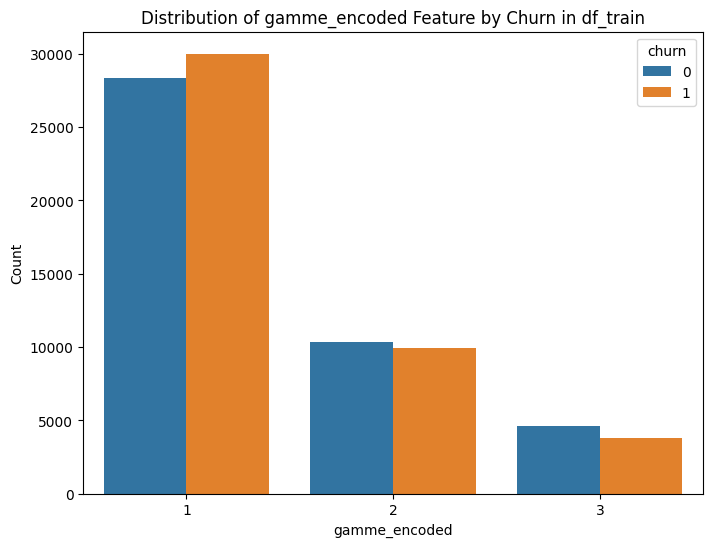

gamme_encode distribution in df_dev


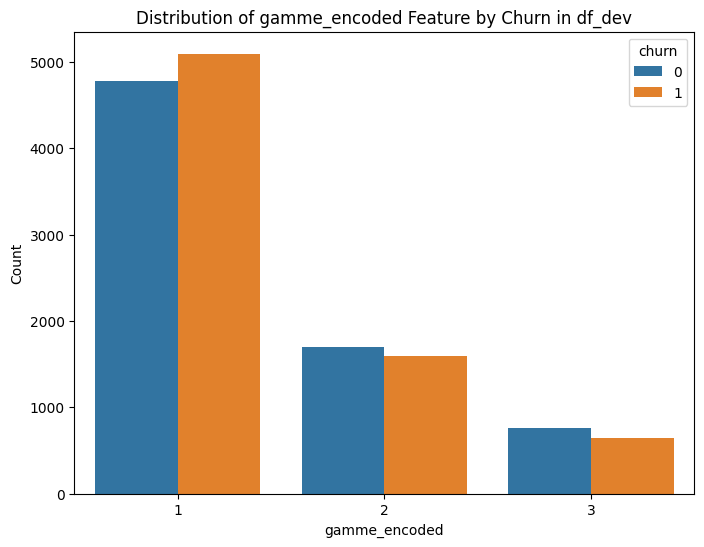

gamme_encode distribution in df_test


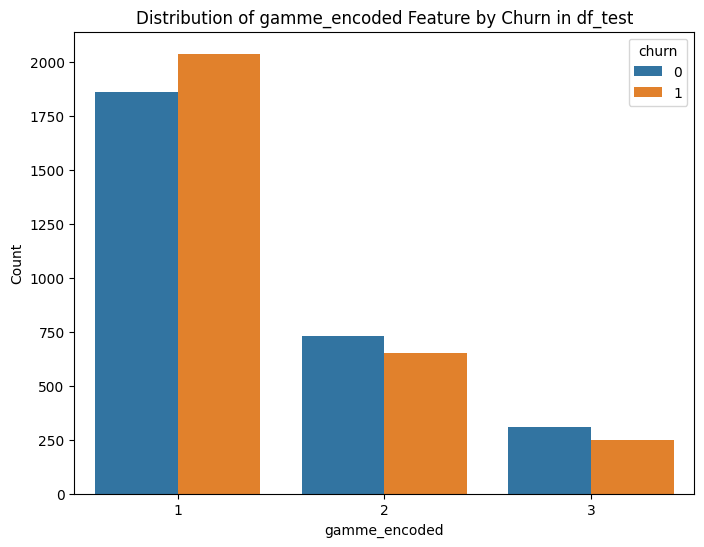

In [81]:
#Plot gamme_encoded distribution labeled by churn
for name, data in {"df_train": df_train, "df_dev" : df_dev, "df_test": df_test}.items():
    print (f"gamme_encode distribution in {name}")
    plt.figure(figsize=(8, 6))  # Set figure size for better visibility
    sns.countplot(data=data, x='gamme_encoded', hue='churn')

    # Set labels and title
    plt.title(f'Distribution of gamme_encoded Feature by Churn in {name}')
    plt.xlabel('gamme_encoded')
    plt.ylabel('Count')

    # Display the plot
    plt.show()

#### Split into x and y sets

In [105]:
#Get features and target variable
x_train, y_train = DataSplitting().get_x_y_data(df_train)
x_dev, y_dev = DataSplitting().get_x_y_data(df_dev)
x_test, y_test = DataSplitting().get_x_y_data(df_test)

In [85]:
#Split data into x_train and y_train
print (f"x_train shape :{x_train.shape}")
print (f"y_train shape :{y_train.shape}")
print ("--------------------------------")
print (f"x_dev shape :{x_dev.shape}")
print (f"y_dev shape :{y_dev.shape}")
print ("--------------------------------")
print (f"x_test shape :{x_test.shape}")
print (f"y_test shape :{y_test.shape}")
print ("--------------------------------")

x_train shape :(86992, 531)
y_train shape :(86992, 1)
--------------------------------
x_dev shape :(14563, 531)
y_dev shape :(14563, 1)
--------------------------------
x_test shape :(5839, 531)
y_test shape :(5839, 1)
--------------------------------


In [106]:
#Reset y_train index
x_train.reset_index(inplace = True, drop=True)
y_train.reset_index(inplace = True, drop=True)

In [107]:
x_train.head()

,complaints_complaints_complaint_status_resolu_duration_nb_1m,complaints_complaints_complaint_status_resolu_total_nb_1m,complaints_complaints_complaint_type_reclamation_total_nb_1m,complaints_complaints_complaint_type_retention_total_nb_1m,complaints_complaints_weekend_n_duration_nb_1m,complaints_complaints_weekend_n_total_nb_1m,complaints_complaints_workingh_y_duration_nb_1m,complaints_complaints_workingh_y_total_nb_1m,data_roamstate_nonroaming_duration_nb_1m,data_workingh_n_volume_nb_1m,...,data_workingh_y_duration_value_1_3w_3_4w,data_workingh_y_volume_value_1_3w_3_4w,voice_call_direction_oc_duration_value_1_3w_3_4w,voice_destination_type_international_duration_value_1_3w_3_4w,voice_destination_type_national_duration_value_1_3w_3_4w,voice_termination_type_offnet_duration_value_1_3w_3_4w,voice_termination_type_onnet_duration_value_1_3w_3_4w,voice_weekend_n_duration_value_1_3w_3_4w,voice_workingh_n_duration_value_1_3w_3_4w,gamme_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,202.0,...,0.000688,0.350786,4.574711,0.0,4.574711,3.367296,4.234107,3.367296,4.234107,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,807.0,367.0,...,0.651672,0.528258,1.286592,0.0,1.294903,0.982976,1.717072,1.328973,1.630342,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.0,150.0,...,-7.575585,-16.692954,0.949891,0.0,0.949891,-3.555348,0.953837,1.313691,1.253288,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,357.0,154.0,...,0.930810,0.831148,-0.499077,0.0,-0.499077,0.579522,-0.522091,-0.243819,-0.109098,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532.0,264.0,...,0.789057,0.680573,-0.230370,0.0,-0.230370,0.000000,-0.230370,-0.722613,0.207521,1


#### Data Normalization

In [108]:
#Add tenure to x_train, x_dev and x_test
x_train["tenure"] = train_tenure["tenure"].values
x_dev["tenure"] = dev_tenure["tenure"].values
x_test["tenure"] = test_tenure["tenure"].values

/var/folders/2q/gyy3wtmd6_b1bxmlfb4j1dvh0000gp/T/ipykernel_58289/368696690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["tenure"] = train_tenure["tenure"].values
/var/folders/2q/gyy3wtmd6_b1bxmlfb4j1dvh0000gp/T/ipykernel_58289/368696690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dev["tenure"] = dev_tenure["tenure"].values
/var/folders/2q/gyy3wtmd6_b1bxmlfb4j1dvh0000gp/T/ipykernel_58289/368696690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [ ]:
#fix the order of features for the standard scaler
x_train =x_train[list(x_train.columns[:-2]) + ["tenure", "gamme_encoded"]]
x_dev =x_dev[list(x_train.columns[:-2]) + ["tenure", "gamme_encoded"]]
x_test =x_test[list(x_train.columns[:-2]) + ["tenure", "gamme_encoded"]]

In [128]:
#Fitting standard scaler on x_train
standard_scaler = StandardScaler().fit(x_train)
standard_scaler

StandardScaler()

In [129]:
#Transform data sets
x_train_norm = standard_scaler.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, columns = x_train.columns)
x_dev_norm = standard_scaler.transform(x_dev)
x_dev_norm = pd.DataFrame(x_dev_norm, columns = x_dev.columns)
x_test_norm = standard_scaler.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, columns = x_test.columns)

In [131]:
x_train_norm.head()

,complaints_complaints_complaint_status_resolu_duration_nb_1m,complaints_complaints_complaint_status_resolu_total_nb_1m,complaints_complaints_complaint_type_reclamation_total_nb_1m,complaints_complaints_complaint_type_retention_total_nb_1m,complaints_complaints_weekend_n_duration_nb_1m,complaints_complaints_weekend_n_total_nb_1m,complaints_complaints_workingh_y_duration_nb_1m,complaints_complaints_workingh_y_total_nb_1m,data_roamstate_nonroaming_duration_nb_1m,data_workingh_n_volume_nb_1m,...,data_workingh_y_volume_value_1_3w_3_4w,voice_call_direction_oc_duration_value_1_3w_3_4w,voice_destination_type_international_duration_value_1_3w_3_4w,voice_destination_type_national_duration_value_1_3w_3_4w,voice_termination_type_offnet_duration_value_1_3w_3_4w,voice_termination_type_onnet_duration_value_1_3w_3_4w,voice_weekend_n_duration_value_1_3w_3_4w,voice_workingh_n_duration_value_1_3w_3_4w,tenure,gamme_encoded
0,-0.211368,-0.209462,-0.107274,-0.199645,-0.199663,-0.183979,-0.201524,-0.205891,-0.012886,0.073007,...,-0.121153,1.982156,-0.048473,1.979250,0.973796,1.851100,1.354749,1.737856,3.619176,-0.643980
1,-0.211368,-0.209462,-0.107274,-0.199645,-0.199663,-0.183979,-0.201524,-0.205891,0.925372,0.611793,...,-0.083173,0.329136,-0.048473,0.332431,0.073586,0.574026,0.347512,0.475952,4.451330,2.377085
2,-0.211368,-0.209462,-0.107274,-0.199645,-0.199663,-0.183979,-0.201524,-0.205891,-0.300848,-0.096792,...,-3.768635,0.159868,-0.048473,0.159198,-1.639876,0.186782,0.339960,0.293214,-0.074056,-0.643980
3,-0.211368,-0.209462,-0.107274,-0.199645,-0.199663,-0.183979,-0.201524,-0.205891,0.067209,-0.083731,...,-0.018352,-0.568564,-0.048473,-0.568341,-0.078740,-0.562064,-0.429683,-0.367061,-0.621847,-0.643980
4,-0.211368,-0.209462,-0.107274,-0.199645,-0.199663,-0.183979,-0.201524,-0.205891,0.400939,0.275460,...,-0.050576,-0.433479,-0.048473,-0.433421,-0.297540,-0.414053,-0.666279,-0.213613,-0.204898,-0.643980


In [132]:
#Saving the standard_scaler
PROCESSORS_PATH = "models/processors"
dump(standard_scaler, open(f"{PROCESSORS_PATH}/{date_time}_standard_scaler_with_tenure.pkl", "wb") )

### Save data 

In [ ]:
#Save data
x_train.to_csv(f"{x_y_sets_path}/{date_time}_x_train_norm.csv", index = True)
x_dev.to_csv(f"{x_y_sets_path}/{date_time}_x_dev_norm.csv", index = True)
x_test.to_csv(f"{x_y_sets_path}/{date_time}_x_test_norm.csv", index = True)
y_train.to_csv(f"{x_y_sets_path}/{date_time}_y_train.csv", index = True)
y_dev.to_csv(f"{x_y_sets_path}/{date_time}_y_dev.csv", index = True)
y_test.to_csv(f"{x_y_sets_path}/{date_time}_y_test.csv", index = True)